In [35]:
import requests
from datetime import datetime, timedelta
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus
import geopandas as gpd

In [39]:
# 측정소별 실시간 측정정보 조회 (매시 15분 내외 업데이트)
base_url = "http://apis.data.go.kr/B552584/ArpltnInforInqireSvc/getMsrstnAcctoRltmMesureDnsty"
with open('keys/에어코리아api4.txt') as file:
    service_key = file.read()       # 발급받은 에어코리아 API 키 입력

In [23]:
station_Name = pd.read_csv('data/대기측정소 test.csv', encoding='utf-8')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
s_world = pd.read_csv('data/세계지도.csv', encoding='utf-8')

C:\Users\human\AppData\Local\Temp\ipykernel_8676\1866840256.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [24]:
s_world

,Country
0,China
1,India
2,United States
3,Indonesia


In [27]:
# 완성코드
def draw_choropleth_map(world, df):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax)
    world.plot(column='Value', ax=ax, legend=True,
            legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})
    plt.show()

def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # result_list에서 미세먼지농도값만 pm10_values에 저장
    pm10_values = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    # 단위빼서 저장
    pop = [int(value.split('ug/m³')[0]) for value in pm10_values]

    # 'Value' 열의 값 출력
    print(pm10_values)

    print(pop)
    
    # 샘플 데이터 생성
    data = {'Country': ['China', 'India', 'United States', 'Indonesia'],
            'Value': pop}
    df = pd.DataFrame(data)
    print(df)
    
    # 지도 데이터와 샘플 데이터를 병합합니다.
    world_merged = world.merge(df, how='left', left_on='name', right_on='Country')


    # 비어있는 값은 0으로 채웁니다.
    world_merged['Value'] = world_merged['Value'].fillna(0)
    
    china_value = world_merged.loc[world_merged['name'] == 'China', 'Value'].values[0]
    print(f'The PM10 value for China: {china_value}')

    # 'Value' 열의 값 출력
    print(world_merged['Value'])
    
# 함수 호출
get_air_quality()

['43ug/m³', '24ug/m³', '39ug/m³', '16ug/m³']
[43, 24, 39, 16]
         Country  Value
0          China     43
1          India     24
2  United States     39
3      Indonesia     16
The PM10 value for China: 43.0
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
Name: Value, Length: 177, dtype: float64


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
172    0.0
173    0.0
174    0.0
175    0.0
176    0.0
Name: Value, Length: 177, dtype: float64
0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object
0            China
1            India
2    United States
3        Indonesia
Name: Country, dtype: object


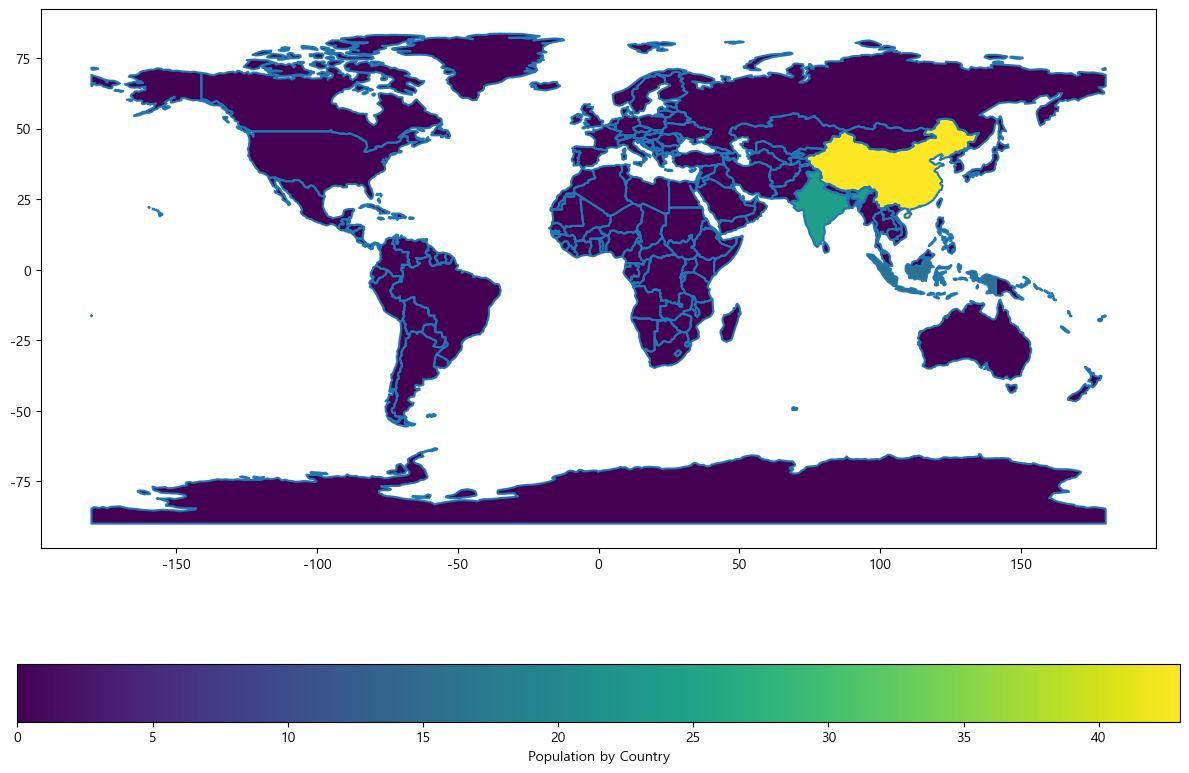

In [25]:
# 완성코드
def draw_choropleth_map(world, df):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax)
    world.plot(column='Value', ax=ax, legend=True,
            legend_kwds={'label': "Population by Country",
                            'orientation': "horizontal"})
    plt.show()

def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # result_list에서 미세먼지농도값만 pm10_values에 저장
    pm10_values = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    # 단위빼서 저장
    pop = [int(value.split('ug/m³')[0]) for value in pm10_values]
    
    # 샘플 데이터 생성
    data = {'Country': s_world['Country'].tolist(),
            'Value': pop}
    df = pd.DataFrame(data)

    # 지도 데이터와 샘플 데이터를 병합합니다.
    world_merged = world.merge(df, how='left', left_on='name', right_on='Country')


    # 비어있는 값은 0으로 채웁니다.
    world_merged['Value'] = world_merged['Value'].fillna(0)

    # 카토그램을 그립니다.
    draw_choropleth_map(world_merged, df)
    
# 함수 호출
get_air_quality()

In [30]:
import requests
import pandas as pd

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # result_list에서 미세먼지농도값만 pm10_values에 저장
    pm10_values = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    # 단위빼서 저장
    data = [int(value.split('ug/m³')[0]) for value in pm10_values]
    
    # 샘플 데이터 생성
    air = {'ID': pop['ID'].tolist(),
            'Value': data}
    df = pd.DataFrame(air)

    # 지도 데이터와 샘플 데이터를 병합합니다.
    merge = pop.merge(df, how='left', left_on='ID', right_on='ID')
    
    # 카토그램 그리기
    drawKorea('미세먼지(PM10) 농도', merge, 'Blues')

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()


ValueError: invalid literal for int() with base 10: '-'

In [40]:
import requests
import pandas as pd
from draw_map import  BORDER_LINES, drawKorea, drawKoreaMinus

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
pop = pd.read_csv('data/카토그램.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # result_list에서 미세먼지농도값만 pm10_values에 저장
    pm10_values = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    
    # 단위를 빼고 저장
    data = []
    for value in pm10_values:
        # 값이 '-'인 경우 0으로 처리하거나 다른 처리를 수행할 수 있습니다.
        if value != '-':
            data.append(int(value.split('ug/m³')[0]))
        else:
            data.append(0)  # 또는 다른 값을 넣어도 됩니다.
    
    # 샘플 데이터 생성
    air = {'ID': pop['ID'].tolist(),
            'Value': data}
    df = pd.DataFrame(air)

    # 지도 데이터와 샘플 데이터를 병합합니다.
    merge = pop.merge(df, how='left', left_on='ID', right_on='ID')
    
    # 카토그램 그리기
    drawKorea('미세먼지(PM10) 농도', merge, 'Blues')

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()

ValueError: invalid literal for int() with base 10: '-'

In [ ]:
import requests
import pandas as pd

# 예제 데이터프레임 생성
station_Name = pd.read_csv('data/전국 대기측정소_완료.csv', encoding='utf-8')
map_raw = pd.read_excel('data/draw_korea_raw(2021).xlsx')
pop = pd.read_csv('data/위도경도_최종.csv', encoding='utf-8')

# 완성코드
def get_air_quality():
    # 결과를 저장할 리스트
    results_list = []
    
    # 각 측정소에 대한 데이터 수집
    for index, row in station_Name.iterrows():
        # 웹 요청시 같이 전달될 데이터 = 요청 메시지
        params = {
            'serviceKey' : service_key,
            'returnType' : 'JSON',
            'numOfRows' : 30,
            'pageNo' : 1,
            'stationName' : row['측정소명'],  # 각 행의 측정소명을 선택
            'dataTerm' : 'DAILY',
            'ver' : "1.4"  # 오퍼레이션 버전
        }

        res = requests.get(url=base_url , params=params)

        # 응답 데이터 정리
        data = res.json()['response']['body']['items']
        
        # 데이터가 존재하면 처리
        if data:
            # 데이터를 날짜와 시간에 대한 기준으로 정렬
            sorted_data = sorted(data, key=lambda x: x['dataTime'], reverse=True)

            # 최신 데이터 선택
            latest_data = sorted_data[0]

            # 최종 데이터 생성
            result = {
                '날짜': latest_data['dataTime'],
                '이름': latest_data['stationName'],
                '측정망 정보': latest_data['mangName'],
                '아황산가스 농도': latest_data['so2Value'] + "ppm",
                '일산화탄소 농도': latest_data['coValue'] + "ppm",
                '오존 농도': latest_data['o3Value'] + "ppm",
                '이산화질소 농도': latest_data['no2Value'] + "ppm",
                '미세먼지(PM10) 농도': latest_data['pm10Value'] + "ug/m³",
                '초미세먼지(PM2.5) 농도': latest_data['pm25Value'] + "ug/m³"
            }

            # 결과 리스트에 추가
            results_list.append(result)

    # result_list에서 미세먼지농도값만 pm10_values에 저장
    pm10_values = [entry['미세먼지(PM10) 농도'] for entry in results_list]
    
    # 단위를 빼고 저장
    data = []
    for value in pm10_values:
        # 값이 '-'인 경우 0으로 처리하거나 다른 처리를 수행할 수 있습니다.
        if value != '-':
            data.append(int(value.split('ug/m³')[0]))
        else:
            data.append(0)  # 또는 다른 값을 넣어도 됩니다.
    
    map_raw.stack()[:10]
    map = pd.DataFrame(map_raw.stack())
    map.reset_index(inplace=True)
    map.columns = ['y','x','ID']
    pop = pd.merge(pop, map)
    
    # 샘플 데이터 생성
    air = {'ID': pop['ID'].tolist(),
            'Value': data}
    df = pd.DataFrame(air)

    # 지도 데이터와 샘플 데이터를 병합합니다.
    merge = pop.merge(df, how='left', left_on='ID', right_on='ID')
    
    # 카토그램 그리기
    drawKorea('미세먼지(PM10) 농도', merge, 'Blues')

# 공기 품질 데이터를 얻기 위해 함수 호출
get_air_quality()